# 03-Loopy Loops

sometimes one loop isn't enough.

Many objects we want to work with are more than 1D.

- The cells in an Excel spreadsheet, which have row and column coordinates.
- Digital images are most easily described similarly in terms of the row and column pixel indexes

Sometimes we need to save more than one value in an object - then we use things called arrays, tuples or lists.

# Arrays, Lists, Tuples

When you want to store several things together python gives several options. The most important thing is that when we have an object like this we can get at the ith member using an `[i]` after the object name.
(You may have seen vectors in matlab already).

In [ ]:
my_array = [5,4,3,2]
print(my_array[2]) # numbering starts from [0]
print(my_array[0])

Actually text ('strings') are lists too, and you can get the ith letter using the same [] syntax.

In [ ]:
my_parrot = 'Dead Parrot'

letter_number = len(my_parrot) # len function returns the length of a list
while letter_number > 0:
    letter_number = letter_number -1
    print(my_parrot[letter_number])

## Nested Loops

we have briefly mentioned `for` loops. They look like this:

In [ ]:
for i in range(10):
    print(i)

*Check you understand the range(function).*

In [ ]:
? range

What happens if we put a loop inside another loop?

In [ ]:
for i in range(5):
    for j in range(5):
        print("i is", i, "and j is", j)

you can see the inner loop (j here) goes through its values quickly, then when it has gone through all possible values the outer loop increments (i here).

Lets try these constructs out using an image.

## Image manipulation

Lets take a stock photo from the [University of Lincoln image library](http://ulimages.thirdlight.com/viewcontainer.tlx?containerid=128959&home=1). 

I've downloaded one (and reduced its file size) and saved it as 'architecture.jpg'. Make sure it is in the same directory that you are working in.

We'll use the Python Image Library for this. Don't worry about the exact commands involving the image library, they just open the file and import its data.

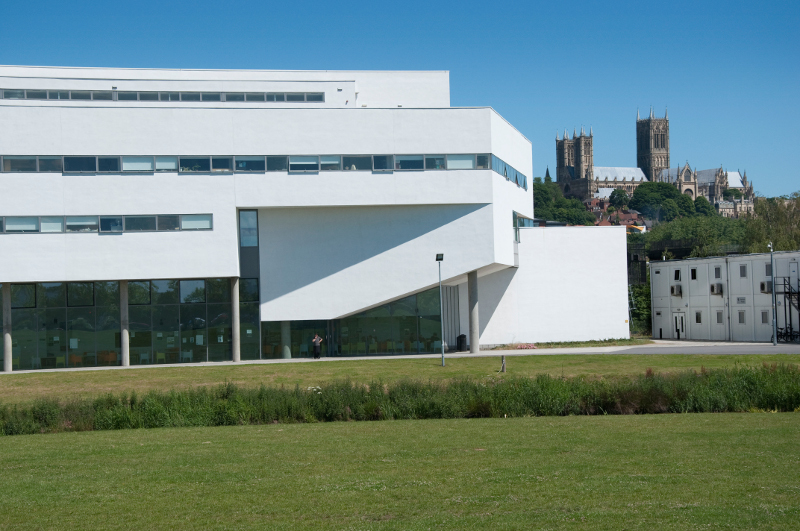

In [2]:
from PIL import Image, ImageDraw
from IPython.display import display # to display images

img = Image.open('architecture.jpg')
img = img.convert('RGB')
pixelMap = img.load()

display(img)

Now lets try making a negative of this image. 

First we use our double loop to go over all the pixels in the image. We can use a method (function attached to the image) of the image we've created `image.size` to find the number of pixels in `x` and `y`, or columns and rows.

Then we change the colour values at that pixel location.

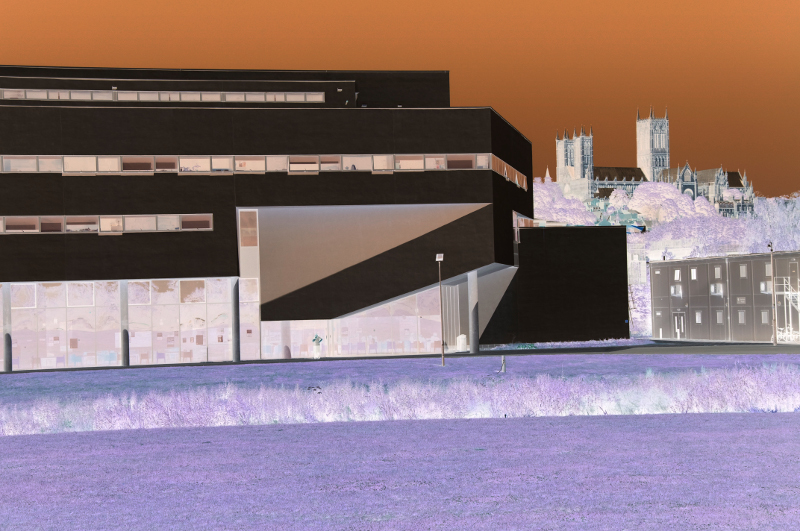

In [3]:
for row in range(img.size[0]):
    for col in range(img.size[1]):
        rgb = pixelMap[row,col]
        pixelMap[row,col] = (255-rgb[0],255-rgb[1],255-rgb[2])

display(img)

You need to understand that each pixel has three values - Red Green Blue, which can each have values between 0 and 255. 0 is none of the colour, and 255 the max. They are stored as a thing called a tuple, but basically a list separated by commas (and in round brackets). For instance brightest red is

```python
(255,0,0)
```
or green

```python
(0,255,0)
```

black is 0 for all three channels, whilst white is 255 for each
```python
(0,0,0) # black
(255,255,255) # white

```
To make the negative image we store the old values for each pixel at a time in an object we call `rgb`, then subtract the old values from 255. The `rgb` is one of these multiple data objects mentioned at the beginning, it has three values we can access with the square brackets.
```
        rgb = pixelMap[row,col]
        pixelMap[row,col] = (255-rgb[0],255-rgb[1],255-rgb[2])
```
For a given row and column we save the old values to rgb. Then we write a new value for the pixel as 255 - the old value.

Lets try changing the colours in another image:

![](Su.jpg)
<br><br>
**Suppose I wanted the Red thing to be bright greeen?**

Again we loop over all the pixels in the image, but now we need to use some logic to try and select the bright red areas.

```
        rgb = pixelMap[row,col]
        if rgb[0] > 200 and rgb[1] < 50 and rgb[2] < 50 :
            pixelMap[row,col] = (0,255,0)
```

We save the RGB values for the pixel to the tuple rgb. The elements of `rgb[i]`, where `i = 0,1,2` hold the values of red, green and blue for that pixel.

So we say if the red value (`rbg[0]`) is greater than 200 *and* there isn't much green (`rgb[1]<50`) *and* there isn't much blue (`rgb[2]<50`), we will change the pixel to green.

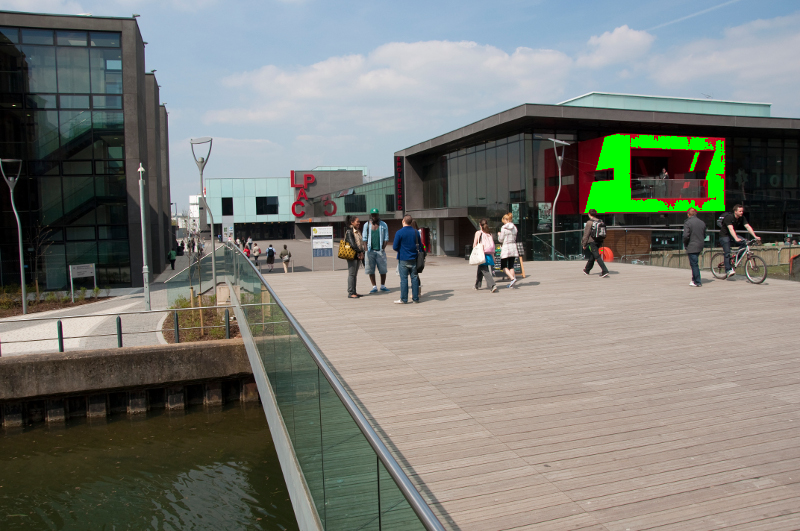

In [4]:
img = Image.open('SU.jpg')
img = img.convert('RGB')
pixelMap = img.load()

for row in range(img.size[0]):
    for col in range(img.size[1]):
        rgb = pixelMap[row,col]
        if rgb[0] > 200 and rgb[1] < 50 and rgb[2] < 50 :
            pixelMap[row,col] = (0,255,0)

display(img)

See what you can do along these lines. 

Can you make it yellow? This [website might be handy](http://www.colorpicker.com/).

# 15 minutes of fame

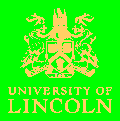

In [5]:
img = Image.open('UoL-logo.jpg')
img = img.convert('RGB')
pixelMap = img.load()

for row in range(img.size[0]):
    for col in range(img.size[1]):
        rgb = pixelMap[row,col]
        if rgb[0] > 200 and rgb[1] > 200 and rgb[2] > 200 :
            pixelMap[row,col] = (0,255,0)
        if rgb[0] < 200 and rgb[1] < 200 and rgb[2] < 200 :
            pixelMap[row,col] = (255,208,100)
display(img)

Can you create your own Warhol? Find a politician / musician / actor / lecturer etc and give it a go. 

![Warhol like effort](https://live.staticflickr.com/4004/4392617172_fb4a799b5c_b.jpg)

You might also need to resize any image you choose. Paint will do if you don't have anything better.

Here's my effort:

In [6]:
img = Image.open('UoL-logo.jpg')
img = img.convert('RGB')
pixelMap = img.load()

for row in range(img.size[0]):
    for col in range(img.size[1]):
        rgb = pixelMap[row,col]
        if rgb[0] > 200 and rgb[1] > 200 and rgb[2] > 200 :
            pixelMap[row,col] = (0,255,0)
        if rgb[0] < 200 and rgb[1] < 200 and rgb[2] < 200 :
            pixelMap[row,col] = (255,208,100)

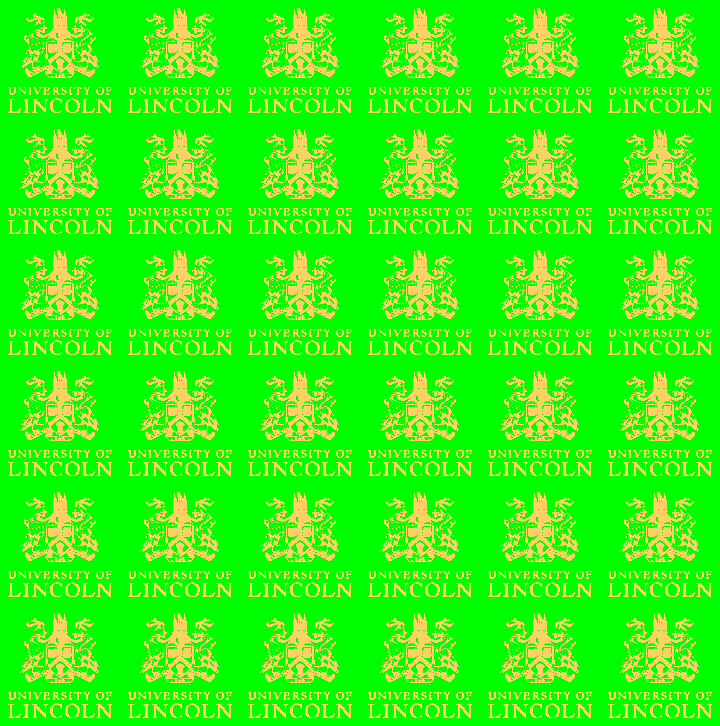

In [7]:
#make a big empty image
imagesx = 6
imagesy = 6
my_collage = Image.new("RGB", (img.size[0]*imagesy, img.size[1]*imagesx), "white")
pixelMapCollage = my_collage.load()

#fill the empty image with replicas of the original image
for ximages in range(imagesx):
    for yimages in range(imagesy):
        #print(ximages,yimages)
        for row in range(img.size[0]):
            for col in range(img.size[1]):
                collagex = img.size[1]*(ximages)+col
                collagey = img.size[0]*(yimages)+row
                pixelMapCollage[collagey,collagex] =  pixelMap[row,col]
                
display(my_collage)

Of course the cloning of the image should be made into a function to make things more portable and readable.

# The end

Hopefully this gives you a small idea of some places that using arrays and tuples might be useful.

- also graphing
- visualization
- gaming
- anywhere where we use matrices and linear algebra

We saw that we can *nest* loops and logic to make powerful constructs.